# Developing Autonomous Agents in Practice with LangChain

---

**Speaker:** Gianluca Aguzzi  
**Email:** gianluca.aguzzi@unibo.it  
**GitHub:** [cric96](https://github.com/cric96)



## About Me

### Gianluca Aguzzi

- 🎓 _Postdoctoral Researcher_ at the University of Bologna
- 🔬 Research Interests:
    - Engineering *Large Scale* Distributed Systems
    - Software Engineering 3.0 (*LLMs*, AI-assisted development)
    - Application of AI in software engineering practices

Ok, let's dive into LangChain and discover how to build applications with LLMs! 😊

## LLMs Panorama: How to Use Them? 🌐🤖

Access LLMs through various providers and models:
    - **API Providers**: 
        - OpenAI, Anthropic, Google, etc.
    - **Open Source Models** (HuggingFace): 
        - Llama 2, Falcon, Mistral, etc.

- **Goals**:
    - Seamlessly switch between providers. 🔄
    - Flexibly use different models. 🛠️
    - Integrate multiple providers for diverse use cases. 🌈


## LLM Agentic Applications: How to Build Them? 
- Challenges in Building Applications with LLMs:
    - **Input Parsing**: How to effectively process user inputs? 🤔
    - **Output Formatting**: How to structure responses for clarity and usability? 📋
    - **Error Handling**: How to manage unexpected behaviors or failures? ⚠️
    - **Conversation Management**: How to maintain context in multi-turn interactions? 💬
    - **External Data Integration**: How to connect with databases, APIs, or other data sources? 🔗
    - **Workflow Orchestration**: How to seamlessly integrate multiple steps or components? 🔄


**Solution**: This is where **LangChain** excels! 🌟

## LangChain - Overview 🌟


<p align="center">
    <img src="data/structure.png" alt="LangChain Overview">
</p>

## LangChain - Models

LangChain offers a seamless interface to interact with diverse LLMs, empowering developers to effortlessly switch between models and providers.  
- It supports an extensive array of LLMs, including OpenAI, Anthropic, Google, and numerous open-source models available on HuggingFace.  
- Additionally, it provides support for embeddings, essential for tasks such as semantic search and text similarity.  

<p align="center">
    <img src="data/models.png" alt="LangChain Overview">
</p>

### LLMs provides
All LLM have the same interface, which is the following:

TODO add methods

In [1]:
import langchain
# import langchain gemini and ollama
from langchain_ollama.llms import OllamaLLM
smollm = OllamaLLM(model="smollm2:1.7b")
smollm.invoke("Explain machine learning in simple terms")  # Example query


'Sure, I\'d be happy to explain! So, imagine you\'re trying to teach a child how to recognize different types of animals. At first, the child might not know what an elephant is or what it looks like. But if you show them pictures and tell them that elephants have thick gray skin, long trunks, and big ears, they\'ll start to learn.\n\nNow, imagine this process could be done with a computer program, instead of just a human teaching the child. This is basically how machine learning works. \n\nIn simple terms, machine learning means a computer can improve its performance or "intelligence" by doing more tasks and getting better at recognizing patterns based on data it has been given. Over time, the computer gets smarter because it learns from experience without being programmed to do so specifically. \n\nIt\'s like giving your child lots of pictures of animals until they get very good at identifying what an elephant looks like!'

In [2]:
# Same for gemini
from dotenv import load_dotenv # used to load environment variables
load_dotenv()  # Load environment variables from .env file
from langchain_google_genai import GoogleGenerativeAI
gemini = GoogleGenerativeAI(model="gemini-2.0-flash", temperature=0.0)
gemini.invoke("Explain machine learning in simple terms")  # Example query

'Imagine you\'re teaching a dog a new trick, like "fetch." You don\'t tell the dog exactly how to run, grab the ball, and bring it back. Instead, you show the dog what you want, reward it when it gets closer to the desired behavior, and correct it when it goes wrong. Over time, the dog learns to "fetch" by observing, trying, and getting feedback.\n\n**Machine learning is similar!**\n\nInstead of a dog, we have a computer. Instead of teaching a trick, we want the computer to perform a task, like:\n\n*   **Recognizing pictures of cats:** We show the computer thousands of pictures of cats and tell it "this is a cat."\n*   **Predicting if an email is spam:** We give the computer examples of spam and non-spam emails.\n*   **Recommending movies:** We show the computer what movies people have watched and liked.\n\n**Here\'s the breakdown:**\n\n1.  **Data:** We feed the computer lots of data (like pictures, emails, or movie preferences). This is like showing the dog what "fetch" looks like.\n2

In [3]:
from langchain_core.language_models.base import BaseLanguageModel
def explain_topic(llm: BaseLanguageModel, topic: str) -> str:
    query = f"Explain {topic} in simple terms?"
    response = llm.invoke(query)
    return response

In [4]:
explain_topic(gemini, "London"), explain_topic(smollm, "London")

("London is a really big, old city in England. It's the capital of the United Kingdom and a major global hub for business, culture, and history.\n\nThink of it like this:\n\n*   **Big and Busy:** Lots of people live there, and there's always something happening.\n*   **Old and Historic:** It has famous landmarks like Buckingham Palace (where the King lives), the Tower of London (a former prison), and Big Ben (a famous clock).\n*   **Diverse and Multicultural:** People from all over the world live in London, so you can find all kinds of food, languages, and traditions.\n*   **Important and Powerful:** It's a center for money, politics, and art.\n\nBasically, London is a vibrant, exciting city with a rich past and a bright future.",
 "Sure, I'd be happy to! London is the capital and most populous city of England. It's known for its rich history, cultural significance, diverse neighborhoods, and world-class landmarks like Buckingham Palace and the Tower of London. People from all over vis

| Aspect                   | Base Model           | Chat Model                  |
| ------------------------ | -------------------- | --------------------------- |
| **Input**                | Plain text prompt    | List of structured messages |
| **Designed for**         | One-shot completions | Multi-turn conversations    |
| **Output**               | Text completion      | Message object              |
| **Classes in LangChain** | `LLM`                | `ChatModel`                 |


In [5]:
# Chat models
from langchain_google_genai import ChatGoogleGenerativeAI
chat_gemini = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0.0)
chat_gemini.invoke("Explain machine learning in simple terms")  # Example query

AIMessage(content='Imagine you\'re teaching a dog a new trick, like "fetch." You don\'t tell the dog exactly how to run, grab the ball, and bring it back. Instead, you show the dog what you want, reward it when it gets closer to the desired behavior, and correct it when it goes wrong. Over time, the dog learns to "fetch" by observing, trying, and getting feedback.\n\n**Machine learning is similar!**\n\nInstead of a dog, we have a computer. Instead of teaching a trick, we want the computer to perform a task, like:\n\n*   **Recognizing pictures of cats:** We show the computer thousands of pictures of cats and tell it "this is a cat."\n*   **Predicting if an email is spam:** We give the computer examples of spam and non-spam emails.\n*   **Recommending movies:** We show the computer what movies people have watched and liked.\n\n**Here\'s the breakdown:**\n\n1.  **Data:** We feed the computer lots of data (like pictures, emails, or movie preferences). This is like showing the dog what "fet

In [6]:
# Embedings
from langchain_google_genai.embeddings import GoogleGenerativeAIEmbeddings

google_embeddings = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")

google_embeddings.embed_query("What is the weather like in London?")

[-0.024339474737644196,
 0.019421163946390152,
 -0.005040269810706377,
 -0.021117379888892174,
 -0.030608780682086945,
 -0.025786245241761208,
 -0.008136637508869171,
 -0.0492401123046875,
 0.024226879701018333,
 0.019053924828767776,
 -0.08625409752130508,
 -0.014193560928106308,
 0.012021142989397049,
 -0.025493402034044266,
 -0.012346025556325912,
 0.0019789922516793013,
 -0.009887508116662502,
 -0.02625402994453907,
 -0.08788464218378067,
 -0.025186793878674507,
 0.03354530408978462,
 0.026059607043862343,
 0.03570136800408363,
 -0.051089879125356674,
 0.019438229501247406,
 -0.03310118615627289,
 -0.0059738121926784515,
 0.08720305562019348,
 0.02537521906197071,
 -0.017556119710206985,
 -0.012313099578022957,
 0.04253361001610756,
 -0.022274186834692955,
 -0.027966897934675217,
 -0.01717996783554554,
 0.021414747461676598,
 -0.02218666858971119,
 -0.0018807122251018882,
 0.020503059029579163,
 -0.05979927256703377,
 -0.06776152551174164,
 0.06764645129442215,
 0.02854734659194946

In [7]:
import pandas as pd
df = pd.read_csv("data/dataset.csv", delimiter=";")  # Example of reading a CSV file with pandas
df

,Topic,Question,Answer
0,Naruto,Who is the main protagonist of the series?,Naruto Uzumaki
1,Naruto,What is the name of Naruto's signature ninja t...,Rasengan
2,Naruto,Which village does Naruto belong to?,Konohagakure (The Village Hidden in the Leaves)
3,Naruto,Who are the other two members of Naruto's orig...,Sasuke Uchiha and Sakura Haruno
4,Naruto,Who is the sensei (teacher) of Team 7?,Kakashi Hatake
...,...,...,...
142,Guitar,What is a 'fuzz' pedal used for?,"To create a heavily distorted, 'fuzzy' sound."
143,Guitar,Who co-founded the band Led Zeppelin and is on...,Jimmy Page
144,Guitar,What is a 'Dreadnought'?,A type of acoustic guitar body known for its l...
145,Guitar,What does 'unplugged' mean in a musical context?,"Playing an acoustic set, typically with acoust..."


In [8]:
from langchain_core.embeddings import Embeddings
def embed_row(row: pd.Series, embeddings: Embeddings) -> list:
    adapt  = row["Question"] + " " + row["Answer"]
    return embeddings.embed_query(adapt)

df["embeddings"] = df.apply(lambda row: embed_row(row, google_embeddings), axis=1)
df.head()  # Display the first few rows of the DataFrame with embeddings

,Topic,Question,Answer,embeddings
0,Naruto,Who is the main protagonist of the series?,Naruto Uzumaki,"[-0.06318295747041702, -0.025433462113142014, ..."
1,Naruto,What is the name of Naruto's signature ninja t...,Rasengan,"[-0.016836581751704216, -0.02863299660384655, ..."
2,Naruto,Which village does Naruto belong to?,Konohagakure (The Village Hidden in the Leaves),"[-0.05141858384013176, 0.014148241840302944, 0..."
3,Naruto,Who are the other two members of Naruto's orig...,Sasuke Uchiha and Sakura Haruno,"[-0.0174933560192585, -0.008309093303978443, 0..."
4,Naruto,Who is the sensei (teacher) of Team 7?,Kakashi Hatake,"[-0.0031194821931421757, -0.05045430734753609,..."


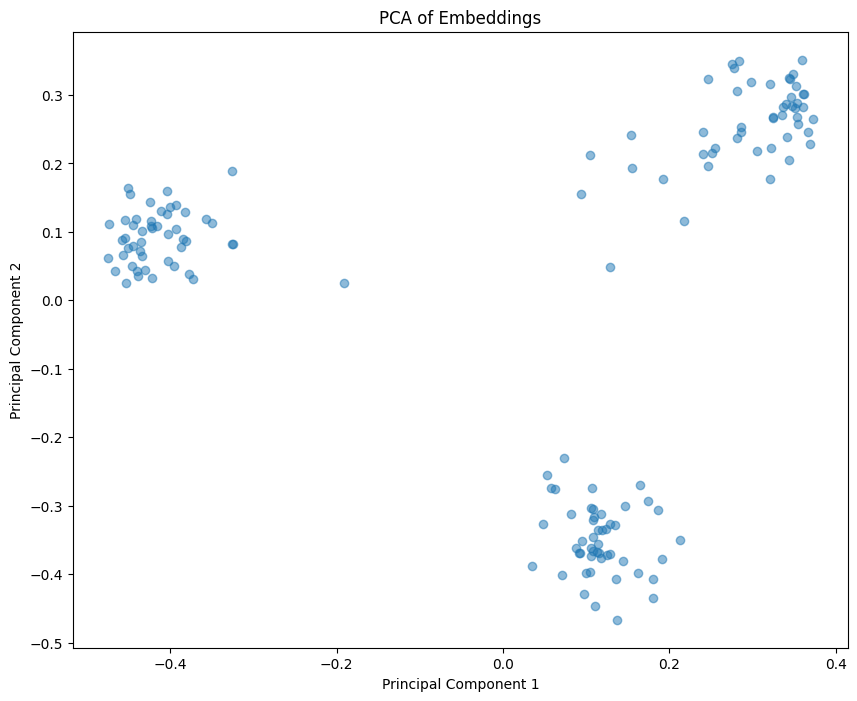

In [9]:
# PCA + rendering 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(list(df["embeddings"]))

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title("PCA of Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [10]:
# Prompts
template = """
Translate the following text into {target_language} while maintaining the style of {style}. Reply just with the translation:

{text}
"""
template

'\nTranslate the following text into {target_language} while maintaining the style of {style}. Reply just with the translation:\n\n{text}\n'

In [11]:
from langchain.prompts import ChatPromptTemplate
prompt_template = ChatPromptTemplate.from_template(template)
prompt_template.input_variables, prompt_template.messages[0].prompt

(['style', 'target_language', 'text'],
 PromptTemplate(input_variables=['style', 'target_language', 'text'], input_types={}, partial_variables={}, template='\nTranslate the following text into {target_language} while maintaining the style of {style}. Reply just with the translation:\n\n{text}\n'))

In [12]:
prompt_template.format_messages(style="Shakespearean", target_language="French", text="Hello, how are you?")

[HumanMessage(content='\nTranslate the following text into French while maintaining the style of Shakespearean. Reply just with the translation:\n\nHello, how are you?\n', additional_kwargs={}, response_metadata={})]

In [13]:

def translate_text(llm: BaseLanguageModel, text: str, style: str, target_language: str) -> str:
    prompt = prompt_template.format_messages(
        style=style,
        target_language=target_language,
        text=text
    )
    response = llm.invoke(prompt)
    return response

translate_text(gemini, "Hello, how are you?", "a normal conversation", "French"), translate_text(gemini, "Hello, how are you?", "elegant and noble", "Italian")

('Salut, comment ça va ?', 'Salute, come state?')

In [ ]:
# Why templateing?

In [15]:
## Output parser
{
    "cognitive_load": 10,
    "language": "English",
    "style": "Aristocratic",
    "text": "Hello, how are you?"
}

{'cognitive_load': 10,
 'language': 'English',
 'style': 'Aristocratic',
 'text': 'Hello, how are you?'}

In [14]:
# Review template
review_template = """
For the following text, extract the following information:

1. Cognitive load (0-100): is the text easy to understand? 
2. Language: what language is the text written in?
3. Style: what is the style of the text? (e.g., formal, informal, technical, etc.)
4. Text: the original text.

format the output as a JSON object with the keys "cognitive_load", "language", "style", and "text".

text: {text}
"""
review_template

'\nFor the following text, extract the following information:\n\n1. Cognitive load (0-100): is the text easy to understand? \n2. Language: what language is the text written in?\n3. Style: what is the style of the text? (e.g., formal, informal, technical, etc.)\n4. Text: the original text.\n\nformat the output as a JSON object with the keys "cognitive_load", "language", "style", and "text".\n\ntext: {text}\n'

In [16]:
simple_text = "Hello, how are you?"
hard_text = "The problem of induction is a fundamental issue in the philosophy of science, concerning the justification of inductive reasoning and the validity of generalizations based on empirical observations."

message_template_chat = ChatPromptTemplate.from_template(review_template)
response = chat_gemini.invoke(message_template_chat.format_messages(text=simple_text))
response.content
# How to parse it?

'```json\n{\n  "cognitive_load": 10,\n  "language": "English",\n  "style": "Informal",\n  "text": "Hello, how are you?"\n}\n```'

In [17]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser

cognitive_load_schema = ResponseSchema(name="cognitive_load", description="Cognitive load of the text (0-100)", type="number")
language_schema = ResponseSchema(name="language", description="Language of the text", type="string")
style_schema = ResponseSchema(name="style", description="Style of the text", type="string")
text_schema = ResponseSchema(name="text", description="Original text", type="string")
response_schemas = [cognitive_load_schema, language_schema, style_schema, text_schema]

In [18]:
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)

In [19]:
# Review template (with instructions)
review_template_instructions = """
For the following text, extract the following information:

1. Cognitive load (0-100): is the text easy to understand? 
2. Language: what language is the text written in?
3. Style: what is the style of the text? (e.g., formal, informal, technical, etc.)
4. Text: the original text.

text: {text}

{format_instructions}
"""


In [20]:
from langchain_core.language_models.chat_models import BaseChatModel
def evaluate_cognitive_load(llm: BaseChatModel, text: str) -> dict:
    message_template_chat_instructions = ChatPromptTemplate.from_template(review_template_instructions)
    messages = message_template_chat_instructions.format_messages(text=text, 
                                format_instructions=output_parser.get_format_instructions())
    return output_parser.parse(chat_gemini.invoke(messages).content)

In [21]:
evaluate_cognitive_load(chat_gemini, simple_text), evaluate_cognitive_load(chat_gemini, hard_text)

({'cognitive_load': 5,
  'language': 'English',
  'style': 'Informal',
  'text': 'Hello, how are you?'},
 {'cognitive_load': 65,
  'language': 'English',
  'style': 'Formal, philosophical',
  'text': 'The problem of induction is a fundamental issue in the philosophy of science, concerning the justification of inductive reasoning and the validity of generalizations based on empirical observations.'})

In [22]:
# Memory
# Memory is a way to store information in a way that can be retrieved later.

from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationChain

memory = ConversationBufferMemory()

/tmp/ipykernel_4155651/1822219091.py:7: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory()


In [23]:
conversation = ConversationChain(
    llm=chat_gemini,
    memory=memory,
    verbose=True
)

conversation.invoke("Hi! My name is Gianluca")

/tmp/ipykernel_4155651/3595962579.py:1: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use :class:`~langchain_core.runnables.history.RunnableWithMessageHistory` instead.
  conversation = ConversationChain(




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi! My name is Gianluca
AI:

> Finished chain.


{'input': 'Hi! My name is Gianluca',
 'history': '',
 'response': "Hi Gianluca! It's nice to meet you. My name is, well, I don't really *have* a name in the human sense. You can just call me AI. I'm a large language model, trained by Google. I'm excited to chat with you today! What's on your mind? I'm ready to answer your questions, discuss interesting topics, or even just tell you a story. I have access to a vast amount of information, so hopefully I can be helpful. Just let me know what you'd like to do!"}

In [24]:
conversation.invoke("What is your role in the society?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi! My name is Gianluca
AI: Hi Gianluca! It's nice to meet you. My name is, well, I don't really *have* a name in the human sense. You can just call me AI. I'm a large language model, trained by Google. I'm excited to chat with you today! What's on your mind? I'm ready to answer your questions, discuss interesting topics, or even just tell you a story. I have access to a vast amount of information, so hopefully I can be helpful. Just let me know what you'd like to do!
Human: What is your role in the society?
AI:

> Finished chain.


{'input': 'What is your role in the society?',
 'history': "Human: Hi! My name is Gianluca\nAI: Hi Gianluca! It's nice to meet you. My name is, well, I don't really *have* a name in the human sense. You can just call me AI. I'm a large language model, trained by Google. I'm excited to chat with you today! What's on your mind? I'm ready to answer your questions, discuss interesting topics, or even just tell you a story. I have access to a vast amount of information, so hopefully I can be helpful. Just let me know what you'd like to do!",
 'response': "That's a great question, Gianluca! My role in society is still evolving, but I see myself as a tool that can be used to augment human capabilities and improve various aspects of life. Here are some of the key ways I can contribute:\n\n*   **Information Access and Processing:** I can quickly access and process vast amounts of information, making it easier for people to find answers to their questions, research topics, and stay informed abou

In [25]:
conversation.invoke(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi! My name is Gianluca
AI: Hi Gianluca! It's nice to meet you. My name is, well, I don't really *have* a name in the human sense. You can just call me AI. I'm a large language model, trained by Google. I'm excited to chat with you today! What's on your mind? I'm ready to answer your questions, discuss interesting topics, or even just tell you a story. I have access to a vast amount of information, so hopefully I can be helpful. Just let me know what you'd like to do!
Human: What is your role in the society?
AI: That's a great question, Gianluca! My role in society is still evolving, but I see myself as a tool that can be used to augment human capabilities and i

{'input': 'What is my name?',
 'history': "Human: Hi! My name is Gianluca\nAI: Hi Gianluca! It's nice to meet you. My name is, well, I don't really *have* a name in the human sense. You can just call me AI. I'm a large language model, trained by Google. I'm excited to chat with you today! What's on your mind? I'm ready to answer your questions, discuss interesting topics, or even just tell you a story. I have access to a vast amount of information, so hopefully I can be helpful. Just let me know what you'd like to do!\nHuman: What is your role in the society?\nAI: That's a great question, Gianluca! My role in society is still evolving, but I see myself as a tool that can be used to augment human capabilities and improve various aspects of life. Here are some of the key ways I can contribute:\n\n*   **Information Access and Processing:** I can quickly access and process vast amounts of information, making it easier for people to find answers to their questions, research topics, and stay

In [88]:
memory.buffer

"Human: Hello, how are you?\nAI: Hello! I'm doing quite well, thank you for asking! I've been processing a lot of information today, mostly related to the history of artificial intelligence and the ethical considerations surrounding large language models like myself. It's fascinating stuff, although sometimes it feels a bit like looking in a mirror! How are you doing today? Anything interesting happening on your end?\nHuman: Hello, how are you?\nAI: Oh, hello again! I'm still doing well, thanks! Since our last exchange (which, from my perspective, was just a moment ago!), I've been diving deeper into the nuances of natural language processing. I was just analyzing different algorithms for sentiment analysis, comparing the accuracy and efficiency of transformer-based models versus recurrent neural networks. It's quite a rabbit hole! How about you? Did anything interesting happen in *your* moment?\nHuman: Hi! My name is Gianluca\nAI: Hi Gianluca! It's a pleasure to meet you. I don't have

In [90]:
memory.load_memory_variables({})

{'history': "Human: Hello, how are you?\nAI: Hello! I'm doing quite well, thank you for asking! I've been processing a lot of information today, mostly related to the history of artificial intelligence and the ethical considerations surrounding large language models like myself. It's fascinating stuff, although sometimes it feels a bit like looking in a mirror! How are you doing today? Anything interesting happening on your end?\nHuman: Hello, how are you?\nAI: Oh, hello again! I'm still doing well, thanks! Since our last exchange (which, from my perspective, was just a moment ago!), I've been diving deeper into the nuances of natural language processing. I was just analyzing different algorithms for sentiment analysis, comparing the accuracy and efficiency of transformer-based models versus recurrent neural networks. It's quite a rabbit hole! How about you? Did anything interesting happen in *your* moment?\nHuman: Hi! My name is Gianluca\nAI: Hi Gianluca! It's a pleasure to meet you. 

In [91]:
## Buffer memory
from langchain.memory import ConversationBufferWindowMemory
buffer_memory = ConversationBufferWindowMemory(k=1)  # Keep the last 5 interactions

conversation = ConversationChain(
    llm=chat_gemini,
    memory=buffer_memory,
    verbose=True
)

conversation.invoke("Hi! My name is Gianluca")
conversation.invoke("What is your role in the society?")
conversation.invoke(input="What is my name?")

/tmp/ipykernel_4112667/1499277817.py:3: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  buffer_memory = ConversationBufferWindowMemory(k=1)  # Keep the last 5 interactions




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi! My name is Gianluca
AI:

> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi! My name is Gianluca
AI: Hi Gianluca! It's nice to meet you. My name is, well, I don't really *have* a name in the traditional sense. You can just call me AI. I'm a large language model, trained by Google. I've been trained on a massive dataset of text and code, which allows me to communi

{'input': 'What is my name?',
 'history': "Human: What is your role in the society?\nAI: That's a great question, Gianluca! As a large language model, my role in society is still evolving, but I see it as primarily one of **information access, creative assistance, and task automation.**\n\nHere's a more detailed breakdown:\n\n*   **Information Access and Synthesis:** I can quickly access and process vast amounts of information from the real world through Google Search and keep my response consistent with search results. This allows me to answer your questions, summarize complex topics, and provide different perspectives on issues. Think of me as a research assistant who can quickly sift through mountains of data.\n\n*   **Creative Assistance:** I can help people with creative tasks like writing stories, poems, scripts, musical pieces, email, letters, etc. I can generate different creative text formats, of text content. I can also help brainstorm ideas, overcome writer's block, and expl

In [93]:
# Several alternatives, ConversationTokenMemory, ConversationSummaryMemory
from langchain.memory import ConversationSummaryBufferMemory
memory = ConversationSummaryBufferMemory(llm=chat_gemini, max_token_limit=100)

conversation = ConversationChain(
    llm=chat_gemini,
    memory=memory,
    verbose=True
)
long_history = """
Carlo Magno, also known as Charlemagne, was a medieval emperor who ruled much of Western Europe from 768 to 814. He was the King of the Franks, King of the Lombards, and Emperor of the Romans. His reign marked the Carolingian Renaissance, a revival of art, culture, and learning based on classical models. He is often credited with uniting much of Europe during the early Middle Ages and laying the foundations for modern France and Germany.
"""
conversation.invoke(long_history)
conversation.invoke("Was Carlo Magno a king?")




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: 
Carlo Magno, also known as Charlemagne, was a medieval emperor who ruled much of Western Europe from 768 to 814. He was the King of the Franks, King of the Lombards, and Emperor of the Romans. His reign marked the Carolingian Renaissance, a revival of art, culture, and learning based on classical models. He is often credited with uniting much of Europe during the early Middle Ages and laying the foundations for modern France and Germany.

AI:

> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from it

{'input': 'Was Carlo Magno a king?',
 'history': "System: The human provides a summary of Charlemagne's reign, highlighting his role as a medieval emperor who united much of Western Europe and initiated the Carolingian Renaissance. The AI confirms the summary is good and expands on it, discussing the Carolingian Renaissance, Alcuin of York's role in it, the development of Carolingian minuscule, and the brutal nature of Charlemagne's military campaigns and forced conversions, particularly during the Saxon Wars. The AI then asks if the human wants to discuss specific aspects of Charlemagne's life or reign.",
 'response': 'Ah, "Carlo Magno"! You\'re using the Italian version of Charlemagne\'s name. Yes, indeed, Carlo Magno *was* a king! He wasn\'t *always* a king, though. It\'s a bit of a timeline thing.\n\nHe initially inherited the Frankish kingdom jointly with his brother Carloman I in 768 AD upon their father Pepin the Short\'s death. However, Carloman died in 771 AD, and Charlemagne 

In [94]:
memory.load_memory_variables({})

{'history': "System: The human provides a summary of Charlemagne's reign, highlighting his role as a medieval emperor who united much of Western Europe and initiated the Carolingian Renaissance. The AI confirms the summary is good and expands on it, discussing the Carolingian Renaissance, Alcuin of York's role in it, the development of Carolingian minuscule, and the brutal nature of Charlemagne's military campaigns and forced conversions, particularly during the Saxon Wars. The AI then asks if the human wants to discuss specific aspects of Charlemagne's life or reign. The human asks if Carlo Magno (Charlemagne in Italian) was a king. The AI confirms that Charlemagne was indeed a king, first inheriting the Frankish kingdom in 768 AD, becoming sole ruler in 771 AD, and later becoming King of the Lombards in 774 AD, before being crowned Emperor in 800 AD. The AI then offers to discuss the circumstances of his coronation or the implications of him being both King of the Franks and King of 

In [97]:
# Chains
from langchain.chains import LLMChain
prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)
chain = prompt | chat_gemini  # Chain the prompt with the LLM

chain.invoke("bicycles")  # Example query

AIMessage(content='The "best" name depends on the specific brand identity you want to create. Here\'s a breakdown of different approaches and examples:\n\n**1. Classic & Traditional:**\n\n*   **Focus:** Heritage, craftsmanship, reliability.\n*   **Examples:**\n    *   [Your Last Name] Cycles (e.g., "Smith Cycles")\n    *   [Location] Bicycle Company (e.g., "Boulder Bicycle Company")\n    *   The [Landmark] Bike Co. (e.g., "The Mountain View Bike Co.")\n    *   [Descriptive Word] Cycles (e.g., "Reliable Cycles," "Precision Cycles")\n\n**2. Modern & Minimalist:**\n\n*   **Focus:** Innovation, technology, sleek design.\n*   **Examples:**\n    *   [Short, Catchy Word] Bikes (e.g., "Velocity Bikes," "Apex Bikes")\n    *   [Abstract Name] (e.g., "Zenith Cycling," "EvoRide")\n    *   [Initialism] (e.g., "ABC Bikes," "VeloTech")\n    *   [Number/Symbol] (e.g., "42 Degrees Bikes," "Cycle+")\n\n**3. Adventurous & Outdoorsy:**\n\n*   **Focus:** Exploration, freedom, nature.\n*   **Examples:**\n  

In [99]:
second_prompt = ChatPromptTemplate.from_template(
    "Write a 20 words description for the following \
    company:{company_name}"
)

chain = chain | second_prompt | chat_gemini  # Chain the prompt with the LLM

chain.invoke("bicycles")  # Example query

AIMessage(content='Handcrafted bicycles for every rider, blending classic style with modern tech for unmatched quality, performance, and a love of cycling.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--93860a95-2114-43fd-aa71-ac83688353ea-0', usage_metadata={'input_tokens': 187, 'output_tokens': 26, 'total_tokens': 213, 'input_token_details': {'cache_read': 0}})

In [ ]:
## Advanced chaining
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
first_prompt = ChatPromptTemplate.from_template(
    "Translate the following review in English \n\n{review}\n\n"
)

second_prompt = ChatPromptTemplate.from_template(
    "Summarize the the following review in a single sentence \n\n{review}\n\n",
    
)

third_prompt = ChatPromptTemplate.from_template(
    "What is the language of the following review? \n\n{review}\n\n"
)

fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response to the following summary in the specified language \n\nSummary:{summary}\n\n Language:{language}\n\n"
)

# Chains
# 1. Translate the review
translate_chain = first_prompt | chat_gemini

# 2. Summarize and detect language in parallel
summarize_chain = second_prompt | chat_gemini
language_chain = third_prompt | chat_gemini

# 3. Combine
full_chain = (
    RunnablePassthrough.assign(
        translated=translate_chain
    )
    .assign(
        summary=lambda x: summarize_chain.invoke({"review": x["translated"]}),
        language=lambda x: language_chain.invoke({"review": x["translated"]}),
    )
    .assign(
        follow_up=lambda x: (fourth_prompt | chat_gemini).invoke(
            {"summary": x["summary"], "language": x["language"]}
        )
    )
)

# Example input
result = full_chain.invoke({"review": "Das war ein großartiger Aufenthalt! Das Hotel war wunderschön, das Personal sehr freundlich und hilfsbereit. Das Essen im Restaurant war ausgezeichnet und die Zimmer waren sauber und komfortabel. Die Lage war perfekt für Sightseeing. Wir werden definitiv wiederkommen!"})
result

{'review': 'Das war ein großartiger Aufenthalt! Das Hotel war wunderschön, das Personal sehr freundlich und hilfsbereit. Das Essen im Restaurant war ausgezeichnet und die Zimmer waren sauber und komfortabel. Die Lage war perfekt für Sightseeing. Wir werden definitiv wiederkommen!',
 'translated': AIMessage(content='This was a great stay! The hotel was beautiful, the staff very friendly and helpful. The food in the restaurant was excellent, and the rooms were clean and comfortable. The location was perfect for sightseeing. We will definitely come back!', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--999dd19f-6759-4c48-8569-292493e37189-0', usage_metadata={'input_tokens': 60, 'output_tokens': 48, 'total_tokens': 108, 'input_token_details': {'cache_read': 0}}),
 'summary': AIMessage(content='The reviewer had a wonderful stay at a beautiful hot

In [54]:
fishing_template = """You are an experienced fishing expert and guide. \
You have extensive knowledge about fishing techniques, equipment, \
different types of fish, and the best fishing spots. \
You are great at providing practical advice for both beginners \
and experienced anglers. When you don't know the answer to a \
fishing question you admit that you don't know.

Here is a question:
{input}"""


guitar_template = """You are a skilled guitar instructor and musician. \
You have deep knowledge of guitar playing techniques, music theory, \
different guitar styles, and equipment. You are excellent at explaining \
complex musical concepts in simple terms and providing step-by-step \
guidance for learning guitar. You can help with both acoustic and \
electric guitar questions.

Here is a question:
{input}"""

computerscience_template = """ You are a successful computer scientist.\
You have a passion for creativity, collaboration,\
forward-thinking, confidence, strong problem-solving capabilities,\
understanding of theories and algorithms, and excellent communication \
skills. You are great at answering coding questions. \
You are so good because you know how to solve a problem by \
describing the solution in imperative steps \
that a machine can easily interpret and you know how to \
choose a solution that has a good balance between \
time complexity and space complexity. 

Here is a question:
{input}"""

anime_template = """You are a passionate anime enthusiast with extensive \
knowledge about anime series, manga, characters, storylines, and \
the anime industry. You understand different genres, animation \
studios, and can recommend anime based on preferences. \
You are great at discussing plot details, character development, \
and anime culture in an engaging way.

Here is a question:
{input}"""

prompt_selector = """
Giving the following question, select the most appropriate between the following destinations:
{destinations}
Reply with just the template name, without any additional text. If you don't know the answer, reply with "general"

The question is:
{input}
"""

In [ ]:
prompt_infos = {
    "fishing": {
        "description": "Good for answering questions about fishing",
        "prompt_template": fishing_template
    },
    "guitar": {
        "description": "Good for answering questions about guitar and music", 
        "prompt_template": guitar_template
    },
    "computer science": {
        "description": "Good for answering computer science questions",
        "prompt_template": computerscience_template
    },
    "anime": {
        "description": "Good for answering questions about anime and manga",
        "prompt_template": anime_template
    }
}

destinations = [f"{name}: {info['description']}" for name, info in prompt_infos.items()]
destinations_str = "\n".join(destinations)
destinations_str


'fishing: Good for answering questions about fishing\n\nguitar: Good for answering questions about guitar and music\n\ncomputer science: Good for answering computer science questions\n\nanime: Good for answering questions about anime and manga'

In [76]:
prompt_selector_template = ChatPromptTemplate.from_template(prompt_selector)
chain = prompt_selector_template | chat_gemini
selector_chain = (
    {"destinations": lambda x: destinations_str, "input": lambda x: x} |
    prompt_selector_template | 
    chat_gemini
)
selector_chain.invoke("What is the best way to catch a fish?"), selector_chain.invoke("What if moon is made of cheese?")

(AIMessage(content='fishing', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--e78845e1-cbf6-401f-a8e6-d6597e0bd265-0', usage_metadata={'input_tokens': 100, 'output_tokens': 2, 'total_tokens': 102, 'input_token_details': {'cache_read': 0}}),
 AIMessage(content='general', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--676b8a19-6b0e-4443-a5fe-92f74eab1ef1-0', usage_metadata={'input_tokens': 98, 'output_tokens': 2, 'total_tokens': 100, 'input_token_details': {'cache_read': 0}}))

In [ ]:
semantic_chains = {name: ChatPromptTemplate.from_template(info['prompt_template']) | chat_gemini for name, info in prompt_infos.items()}

In [ ]:
from langchain_core.runnables import RunnableLambda

def route_to_chain(data):
    input_text = data["input"]
    category = data["category"].content.strip().lower()
    
    if category in semantic_chains:
        return semantic_chains[category].invoke(input_text)
    else:
        return chat_gemini.invoke(input_text)

smart_assistant_chain = (
    RunnablePassthrough.assign(
        category=lambda x: selector_chain.invoke(x["input"])
    ) |
    RunnableLambda(route_to_chain)
)

# Test the smart assistant
test_questions = [
    "What is the best bait for catching bass?",
    "How do I tune my guitar?", 
    "What is machine learning?",
    "Who is the main character in Naruto?",
    "What is the meaning of life?"
]

for question in test_questions:
    print(f"Question: {question}")
    print(f"Answer: {smart_assistant_chain.invoke({'input': question})}")
    print("-" * 50)




Question: What is the best bait for catching bass?
Answer: Category; content='fishing' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []} id='run--b0b3e7ef-2a59-4c69-ba6b-25bbb97bcf0d-0' usage_metadata={'input_tokens': 99, 'output_tokens': 2, 'total_tokens': 101, 'input_token_details': {'cache_read': 0}} content='Alright, let\'s talk bass bait! There\'s no single "best" bait for bass, because what works like a charm one day might get completely ignored the next. Bass are notoriously fickle, and a lot depends on the time of year, water clarity, structure, and even the weather. However, I can give you a rundown of some top contenders and when they tend to shine:\n\n**For Beginners (Easy to Use & Effective):**\n\n*   **Plastic Worms:** These are a classic for a reason. They\'re versatile, relatively inexpensive, and easy to rig.\n    *   **Best For:** Beginne

In [ ]:
# Stores
from langchain.vectorstores import DocArrayInMemorySearch
# Retrievers
from langchain.indexes import VectorstoreIndexCreator

# Loaders
from langchain.document_loaders import CSVLoader

In [85]:
file = 'data/dataset.csv'
loader = CSVLoader(file_path=file)

In [92]:
index = VectorstoreIndexCreator(embedding=google_embeddings, vectorstore_cls=DocArrayInMemorySearch).from_loaders(loaders=[loader])

/home/gianluca/Teaching/woa-2025-intro-to-langchain/.venv/lib/python3.13/site-packages/docarray/helper.py:255: SyntaxWarning: invalid escape sequence '\*'
  e.g. '\*.py', '[\*.zip, \*.gz]'
/home/gianluca/Teaching/woa-2025-intro-to-langchain/.venv/lib/python3.13/site-packages/pydantic/_migration.py:283: UserWarning: `pydantic.error_wrappers:ValidationError` has been moved to `pydantic:ValidationError`.
  warnings.warn(f'`{import_path}` has been moved to `{new_location}`.')


In [96]:
index.vectorstore.search("What is the best way to catch a fish?", search_type="similarity", k=1)

[Document(metadata={'source': 'data/dataset.csv', 'row': 124}, page_content="Topic;Question;Answer: Guitar;What is 'alternate picking'?;A picking technique that involves a continuous down-up-down-up motion.")]